In [35]:
from sklearn.datasets import load_boston
import pandas as pd

from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
#Переменная, которую надо предсказать - ’MEDV’.

#Прочитать информацию о содержимом датасета:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

CRIM	уровень преступности на душу населения по городам	\
ZN	доля жилой земли, зонированной для участков площадью более 25 000 кв.фут.	\
INDUS	доля неторговых бизнес-акров в расчете на один город	\
CHAS	Фиктивная переменная Чарльз-Ривер (= 1, Если тракт ограничивает реку; 0 в противном случае)	\
NOX	концентрация оксидов азота (частей на 10 млн.)	\
RM	среднее количество комнат на одно жилое помещение	\
AGE	доля занятых собственниками объектов, построенных до 1940 года	\
DIS	взвешенные расстояния до пяти бостонских центров занятости	\
RAD	индекс доступности радиальных магистралей	\
TAX	ставка налога на недвижимость с полной стоимостью за $ 10 000	\
PTRATIO	соотношение учащихся и учителей по городам	\
B	1000 (Bk - 0,63)^2, где Bk-доля чернокожих по городам	\
LSTAT	% более низкий статус населения	\
MEDV	Медианная стоимость домов, занятых владельцами, в 1000-х годах	\

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


**Количество записей невелико - 506. Пропусков в данных нет**

In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Все показатели числовые, дальше проверим зависимости между ними**

<AxesSubplot:>

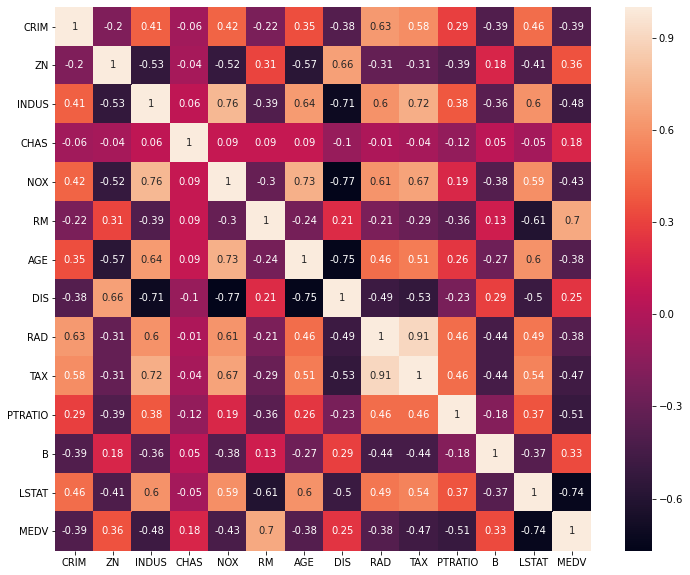

In [10]:
correlation_matrix = data.corr().round(2)
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

**Самая сильная кореляция MEDV идет с показателями RM (среднее количество комнат на одно жилое помещение) и LSTAT (% населения с низким социальным статусом), что ожидаемо. Чем больше комнат, тем дороже жильё и чем более бедное население проживает в районе, тем стоимость жилья ниже**

**Так как по показателю криминогенности есть большой разброс данных, исследуем его подробней**

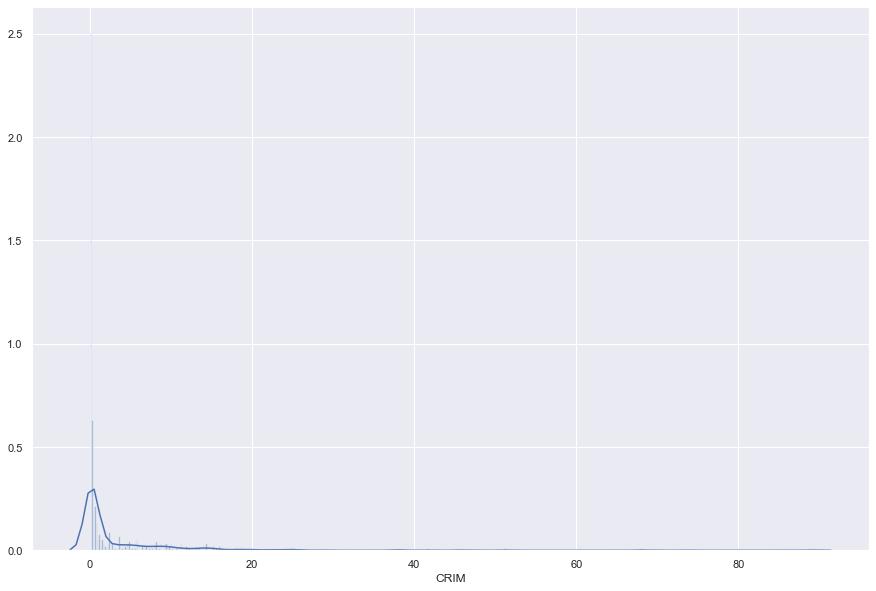

In [19]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.distplot(data['CRIM'], bins=506)
plt.show()

**Видно что есть два значительных выброса, а дальше идет болеее-менее стабильное затухание. Не понятно какэто можно использовать для предсказаний - пока пропустим**

**Попробуем построить предсказательную модель основываясь на RM (среднее количество комнат на одно жилое помещение) и LSTAT (% населения с низким социальным статусом)**

In [24]:
x = data[['LSTAT', 'RM']]
y = data['MEDV']

**Разделим данные на тренировочные и тестовые**

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

**Обучаем модель**

In [29]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Тестируем модель и проверяем метрики точности**

In [39]:
y_pred = model.predict(x_test)

print("Метрика R2: \t", r2_score(y_test, y_pred))
print("Среднеквадратичная ошибка: \t", sqrt(mean_squared_error(y_test, y_pred)))
print("Средняя абсолютная ошибка: \t", mean_absolute_error(y_test, y_pred))

Метрика R2: 	 0.6628996975186954
Среднеквадратичная ошибка: 	 5.137400784702911
Средняя абсолютная ошибка: 	 3.7913102133431047


**Абсолютная ошибка составляет 3,8 при среднем заначении прогнозируемого показателя 22,5. что является неплохим результатом**